In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, rgb2hex

colors = ['#E2DFD0', '#32012F']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=4)

# 将 colormap 转换为十六进制颜色列表
cmap_hex_list = [rgb2hex(rgba) for rgba in cmap(np.linspace(0, 1, 4))]
cmap_hex_list


['#e2dfd0', '#a7959a', '#6d4b65', '#32012f']

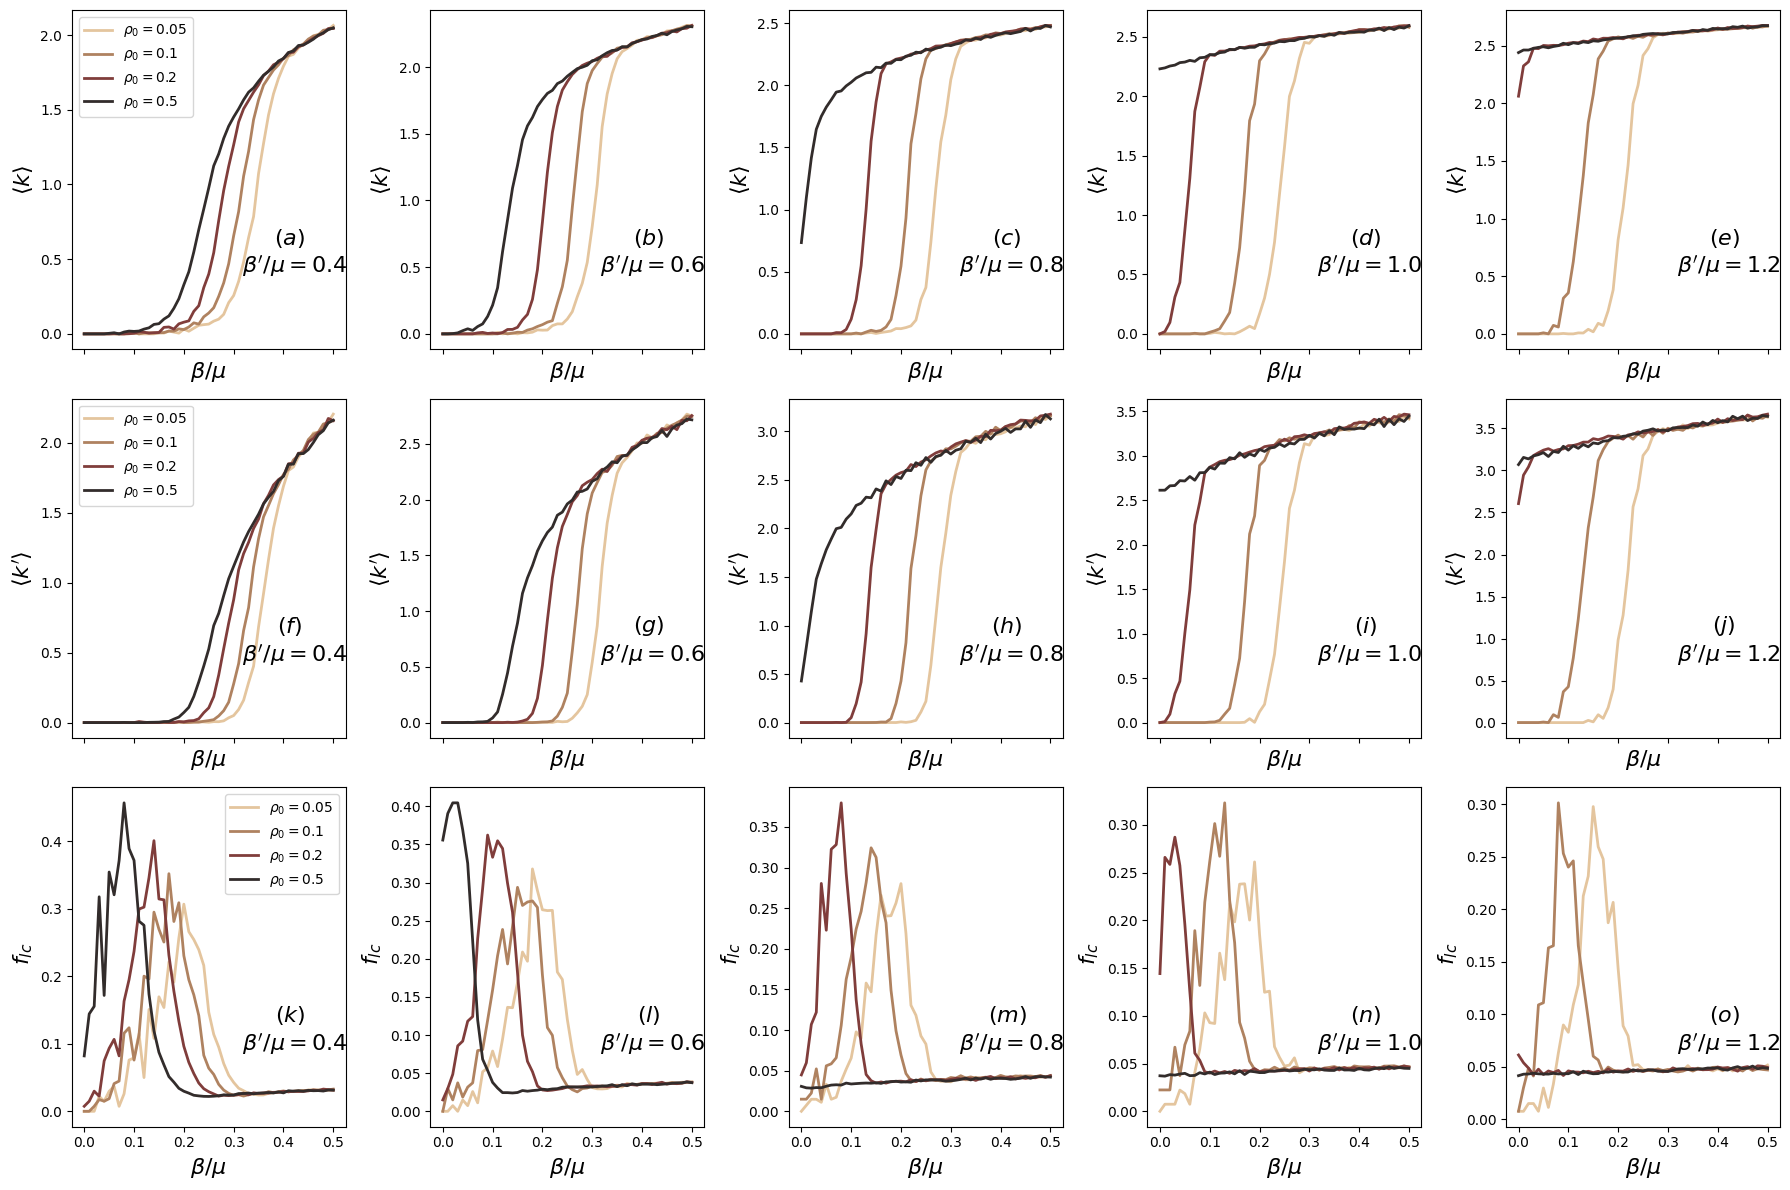

In [7]:


# 读取 simu 数据
df_simu = pd.read_csv('../simulation_result/FIG02_simu.csv', header=None)
columns = ['infect_result', 'beta_h', 'beta', 'sign', 'seed', 'num_agents', 'id'] + ["S_K", "S_HighOrderK", "S_CC_Ratio",
                                                                                      "I_K", "I_HighOrderK", "I_CC_Ratio",
                                                                                      "A_K", "A_HighOrderK", "A_CC_Ratio"]
df_simu.columns = columns

parameters = [(seed, beta_h) for seed in [0.05, 0.1, 0.2, 0.5] for beta_h in [0.4, 0.6, 0.8, 1.0, 1.2]]

# 创建子图
fig, axes = plt.subplots(3, 5, figsize=(18, 12), sharex=True, sharey=False)

# 标识符和颜色映射
title_map = 'abcdefghijklmno'
color_map = ['#E4C59E','#AF8260','#803D3B','#322C2B']
# color_map = cmap_hex_list
seedmap = [0.05, 0.1, 0.2, 0.5]
beta_h_map = [0.4, 0.6, 0.8, 1.0, 1.2]

# 指定要绘制的列名前缀
plot_prefixes = ['I']
plot_suffixes = ['K', 'HighOrderK', 'CC_Ratio']
y_label_map = ['${\langle k\\rangle}$','${\langle k\' \\rangle}$',' $f_{lc}$']

# 循环绘制每个子图
for sign in range(20):
    col = sign % 5
    row = sign // 5
    seed = parameters[sign][0]
    
    data_simu = df_simu[(df_simu['sign'] == sign)].sort_values(by='beta').groupby('id').mean()
    
    for i, prefix in enumerate(plot_prefixes):
        for j, suffix in enumerate(plot_suffixes):
            ax = axes[j,col]
            col_name = prefix + '_' + suffix
            ax.plot(data_simu['beta'], data_simu[col_name], c=color_map[row], alpha=1,linewidth = 2,
                     label=f'$\\rho_0 = {seed}$')
            
            ax.set_title(f'$({title_map[j*5+col]})$ \n $\\beta\'/\\mu = {parameters[col][1]}$',
                         x=0.8, y=0.2, horizontalalignment='center',fontsize = 16)
            ax.set_xlabel('$\\beta/\\mu$',fontsize = 16)
            ax.set_ylabel(y_label_map[j],fontsize = 16)
            if col == 0 :
                ax.legend(loc=0)
        
plt.tight_layout()
# plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig05_network.pdf', format='pdf', bbox_inches='tight')
plt.show()